# User Created Color Maps and Legends with Geopandas

## Introduction

### Summary

This notebook provides example of using user-constructed colormaps used with Geopandas, and then displaying them in legends.

### Context

I recently had the need to use Geopandas to display two sets of spatial data.  One was the locations of sites where water quality is being measured  (so Point features), and the other was the zoning boundaries for the local Council (so Polygon features).

Being a Geopandas fan, I decided to use Geopandas to display both sets of spatial data

I was unhappy about the appearence of the resulting map.  My usual color map that shows best different categories is ```set3```, but in this case, I also wanted to distinguish between the point marker colors, as well as the polygon area colors.

There is also the fact that each Geopandas ```plot``` call seems to reset Axes legend, so that only one set of colors used (that from the last Geopandas call) gets displayed to the map viewer.

This notebook illustrates alternatives to solve both problems.

### Source Material

I have recently bought a truly excellent book *Cartographer's Toolkit*, by Gretchen Peterson:  __[Amazon link](https://www.amazon.com/dp/0615467946?psc=1&ref=ppx_yo2ov_dt_b_product_details)__

One of the sections of the book contains sets of color maps for cartographic use.  Essentially you can browse the book, and select the *look* that takes your fancy.

I chose to use one of the coordinated palettes  (that on page 17 in my edition) for labelling my zone polygons. Gretchen abstains from naming her palettes:

>However, the palettes are intentionally left unlabeled as it is not the author’s wish to skew the
reader’s color preferences with descriptive words.

I chose to use a _Coordinated Palette_, because the main actors on the map were the measurement sites, and the zoning information was to some extent secondary.  To quote:

> These palettes were selected for their harmony of color
and are particularly useful for creating a coordinated map
color scheme.

I didn't want the zoning polygons shouting their uniqueness, and distracting from the markers for measurement site .

## Notebook Environment

This section contains the Python packages used, and the supporting Jupyter libraries.

### Imports

In [18]:
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mpc
from matplotlib.lines import Line2D

# used for environment identification
import sys
import os
import platform
import datetime

### Supporting libraries

```watermark``` allows you to easily document the environment a Jupyter notebook runs in.

```lab_black``` automatically formats all cells in a standard style (although I have tweeked it to use single quotes by default)

In [19]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [20]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


---------------------------------------

## Data exploration of example dataset

I am using an example dataset from Geopandas to illustrate my techniques, being that of the New York borough boundaries.

Read and show with the most minimal of plots what the data looks like.

In [21]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

<Axes: >

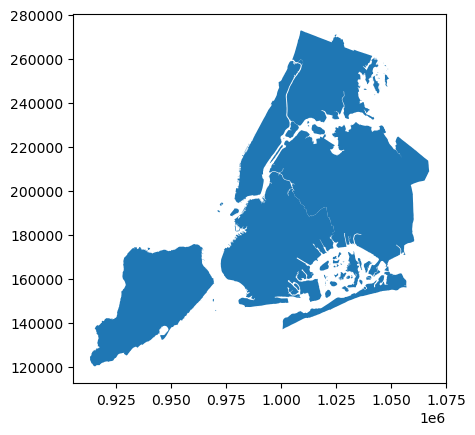

In [22]:
df = gpd.read_file(gpd.datasets.get_path("nybb"))
df.plot()

In [23]:
df.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


-------------------------
## Default visualization

So now, we  distinguish different Boroughs, using the default color map.  We have specified that a legend be shown in the upper left position.  We set the background color to black.

<Axes: >

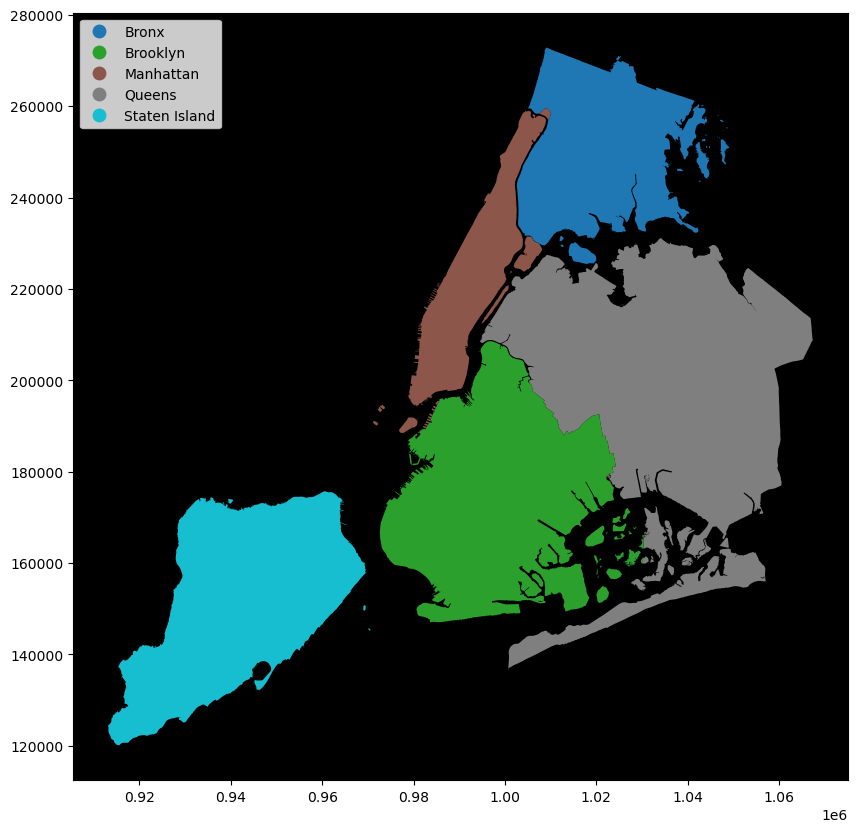

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('black')

df.plot(
    ax=ax,
    column='BoroName',
    legend=True,
    legend_kwds={
        'loc': 'upper left',
    },
)

As before, I feel the color map is not what I want, so l now create one of my own, from page 17 of *Cartographer's Toolkit*.  I first get a count of the different Boroughs  names  (which I know from data exploration is five), and define a set of RGB 0-255 colors, taken from the book (the first six specified).

I then convert the RGB color integer triples to ```matplotlib``` style float triples.  

The next step to create a ```LinearSegmentedColormap```, using the color list we have specified, and the count of categories to be portrayed.

Then we visualize this color map.

In [25]:
count = df['BoroName'].unique().shape[0]

colors_int = [
    (121, 154, 40),
    (0, 167, 109),
    (109, 192, 103),
    (76, 191, 173),
    (179, 210, 52),
    (106, 115, 104),
]

# convert int rgb color to float
colors = [
    (r / 255, g / 255, b / 255) for (r, g, b) in colors_int
]

cmap_name = 'GNP-17'
cmap = mpc.LinearSegmentedColormap.from_list(
    cmap_name,
    colors[0:count],
    N=count,
)

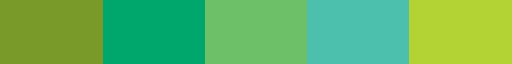

In [26]:
cmap

### Using the color map

We now use this color map.  I think the black background creates  too much contrast, so I used a bland color from the same palette (Color 8, Page 17)

Beauty is in the eye of the beholder, but subjectively I think is more stylish.

<Axes: >

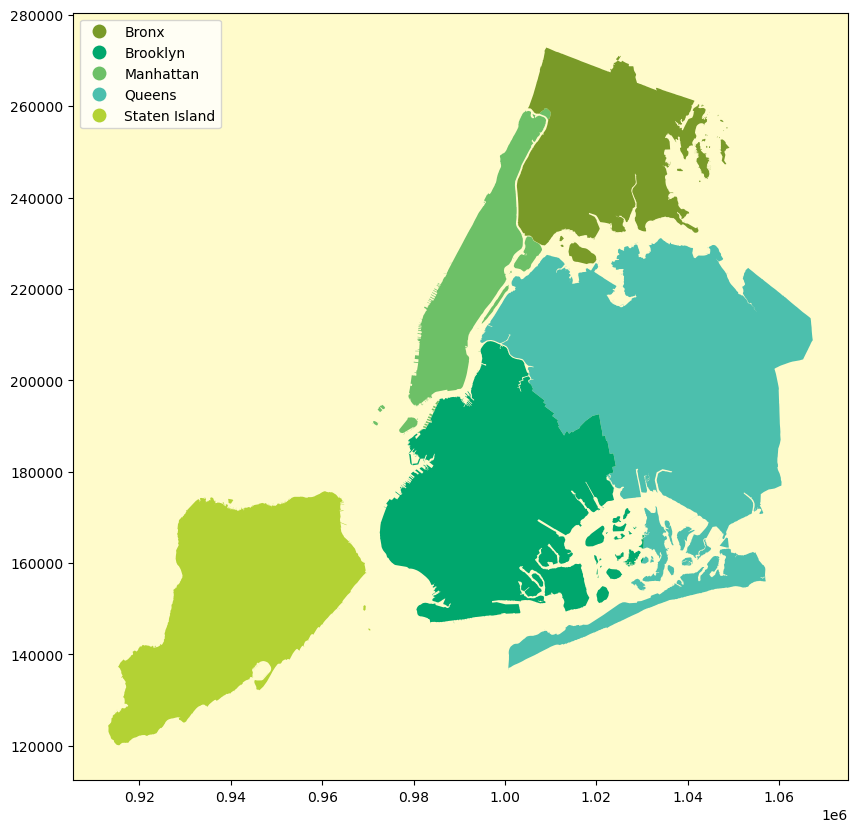

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor((255 / 255, 251 / 255, 203 / 255))

df.plot(
    ax=ax,
    column='BoroName',
    legend=True,
    legend_kwds={
        'loc': 'upper left',
    },
    cmap=cmap,
)

----------------------------------
## Plotting multiple categories

### Dataset creation

Purely as an example, we will now create a set of Point features (being the centroid of each borough), by creating a new column, as below.

In [28]:
df['centroid'] = df.centroid
df.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,centroid
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",POINT (941639.450 150931.991)
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",POINT (1034578.078 197116.604)
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",POINT (998769.115 174169.761)
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",POINT (993336.965 222451.437)
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",POINT (1021174.790 249937.980)


### Geopandas fail(?)

The code snippet below illustrates a problem with Geopandas.  We do two Geopandas plot calls:
> The first plots the borough polygons, and asks for a legend at the upper left

> The second plots the geometry created from the centroids, using large square markers and a very distinctive color map (fully saturated), and asks for a legend at upper right

As you can see, we get one legend, showing the color map used for the Points  (and not where we wanted it)

<Axes: >

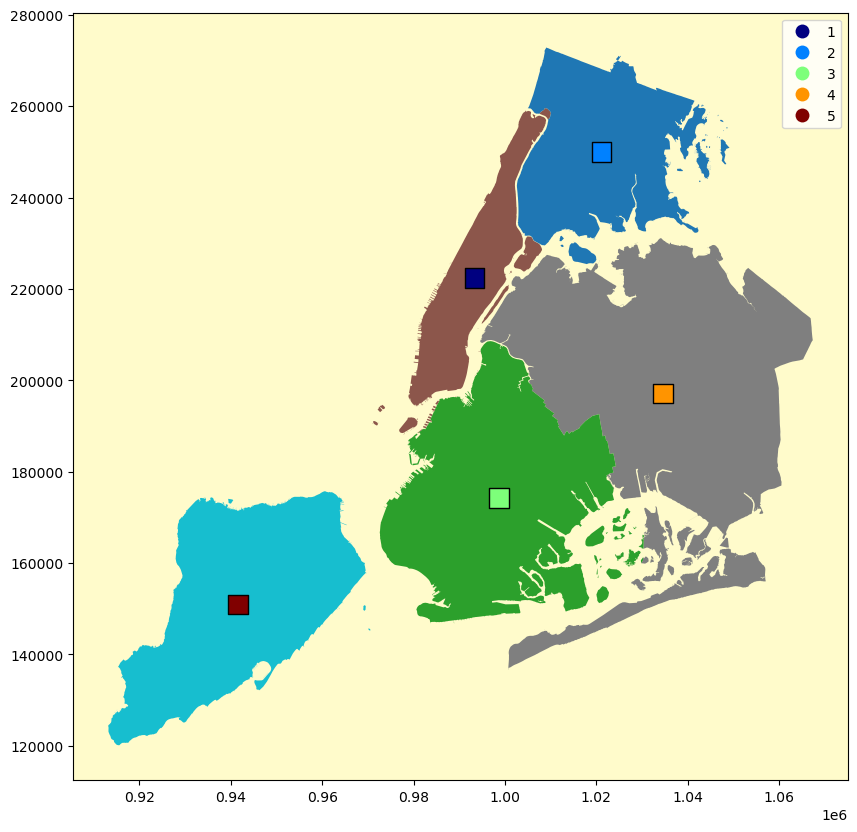

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor((255 / 255, 251 / 255, 203 / 255))

df.plot(
    ax=ax,
    column='BoroName',
    legend=True,
    categorical=True,
    legend_kwds={
        'loc': 'upper left',
    },
)


df.set_geometry('centroid').plot(
    ax=ax,
    column='BoroCode',
    legend=True,
    categorical=True,
    legend_kwds={
        'loc': 'upper right',
    },
    marker='s',
    cmap='jet',
    markersize=200,
    edgecolor='black',
)

----------------------------

## Missing legend workaround 1

```matplotlib``` has good examples on how to manage your own legends:  see https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html

Essentially, a legend item is made up of a ```handle``` to some graphic object, and the text to be displayed beside the representation of the object in the legend.

After any Geopandas call, we can interact with the current Axes object, get the newly defined legend, and save the handles and text.  Then when we are done Geopandas ploting, we merge the lists of handles and text, and create a legend that is an union of the legends created by each Geopandas plot call.

The example below show that this works, but is not very nice.  The drawbacks are:
> There has to be a combined legend title for each of the two concepts being illustrated by the color maps

> There is no way to tell when one legend stops, and the second starts

> The Polygon and Point features share a common symbol in the part of the legend that shows color

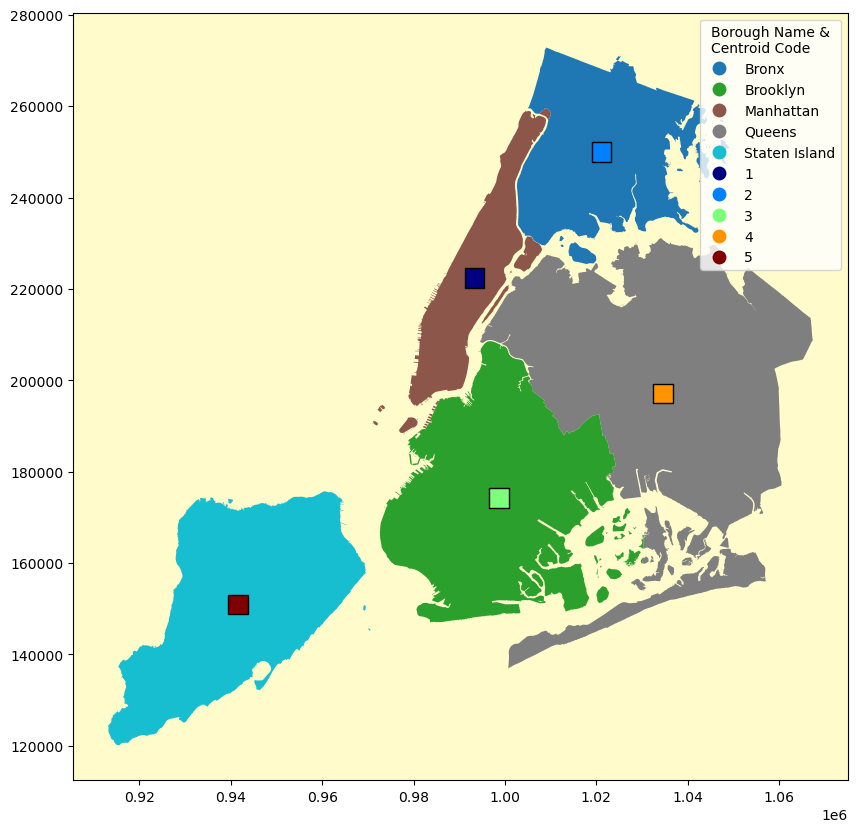

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor((255 / 255, 251 / 255, 203 / 255))

df.plot(
    ax=ax,
    column='BoroName',
    legend=True,
    categorical=True,
    legend_kwds={
        'loc': 'upper left',
    },
)

leg1 = ax.get_legend()

h1 = leg1.legend_handles
t1 = [t.get_text() for t in leg1.texts]

df.set_geometry('centroid').plot(
    ax=ax,
    column='BoroCode',
    legend=True,
    categorical=True,
    legend_kwds={
        'loc': 'upper right',
    },
    marker='s',
    cmap='jet',
    markersize=200,
    edgecolor='black',
)
leg2 = ax.get_legend()
h2 = leg2.legend_handles
t2 = [t.get_text() for t in leg2.texts]

# create a new legend from the handles and text saved previously
ax.legend(h1 + h2, t1 + t2)
leg = ax.get_legend()
leg.set_title(
    'Borough Name &\nCentroid Code',
)

----------------------
## Missing legend workaround 2

The second workaround uses the concept an ```Artist```.  We can ask an Axes object to add any object that renders a figure to the FigureCanvas.  The general approach is:
> After each legend is created by a Geopandas plot call, we get and save the legend handles and text

> When done Geopandas plotting, we create a legend object from the handles and text saved from the Centroid Point plotting, and add that legend as an Artist to the Axes object

> Then we create a legend object that will be the primary legend for the graphic.  

Both legends can have a different look.  In the example below, the Centroid legend (added as an Artist) has a font size of 8 (small), while the main legend has a title font size of 15 (large). The Geopandas plot call for the Polygons has ```alpha``` set to 50%, to give a more muted look.

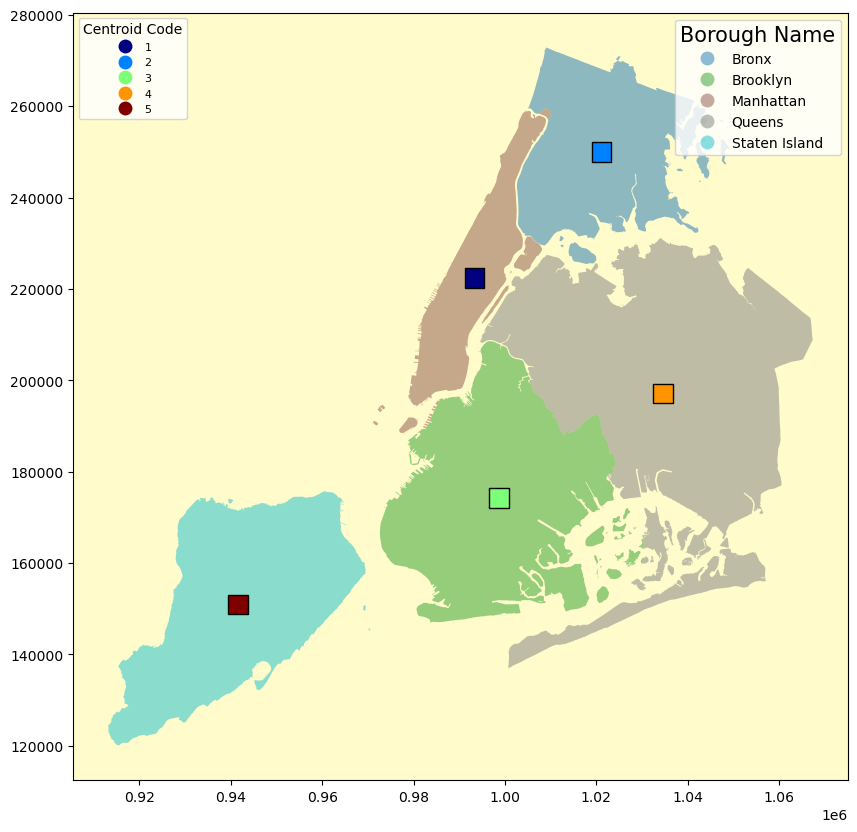

In [31]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor((255 / 255, 251 / 255, 203 / 255))

df.plot(
    ax=ax,
    column='BoroName',
    legend=True,
    categorical=True,
    legend_kwds={
        'loc': 'upper left',
    },
    alpha=0.5,
)

leg1 = ax.get_legend()

h1 = leg1.legend_handles
t1 = [t.get_text() for t in leg1.texts]

df.set_geometry('centroid').plot(
    ax=ax,
    column='BoroCode',
    legend=True,
    categorical=True,
    legend_kwds={
        'loc': 'upper right',
    },
    marker='s',
    cmap='jet',
    markersize=200,
    edgecolor='black',
)
leg2 = ax.get_legend()
h2 = leg2.legend_handles
t2 = [t.get_text() for t in leg2.texts]

centroid_legend = plt.legend(
    h2,
    t2,
    loc='upper left',
    fontsize=8,
)
centroid_legend.set_title('Centroid Code')
ax.add_artist(centroid_legend)

ax.legend(
    h1,
    t1,
    loc='upper right',
    title_fontsize=15,
).set_title('Borough Name')

----------------------
## Missing legend workaround 3

In the last and final workaround, we go one step more in creating a bespoke legend for the Centroid Points.  We don't just use the handles and text from the legend created by Geopandas, we extract the __color__ of the object the handle represents, and construct new graphic objects (in this case 2D Lines) that match the style used in the Geopandas plot call (e.g., the marker color, marker symbol, marker edge color, marker label, and so on).

As can be seen from the figure below, now the legend for the Centroid Points matches more closely the actual symbols used on the map.

We use the same process as previously to get two legends:  create one (in this case the Centroid Point legend) and add it as an Artist.  Then create a second legend in the Axes object by using the handles and text saved from the first Geopandas plot call.

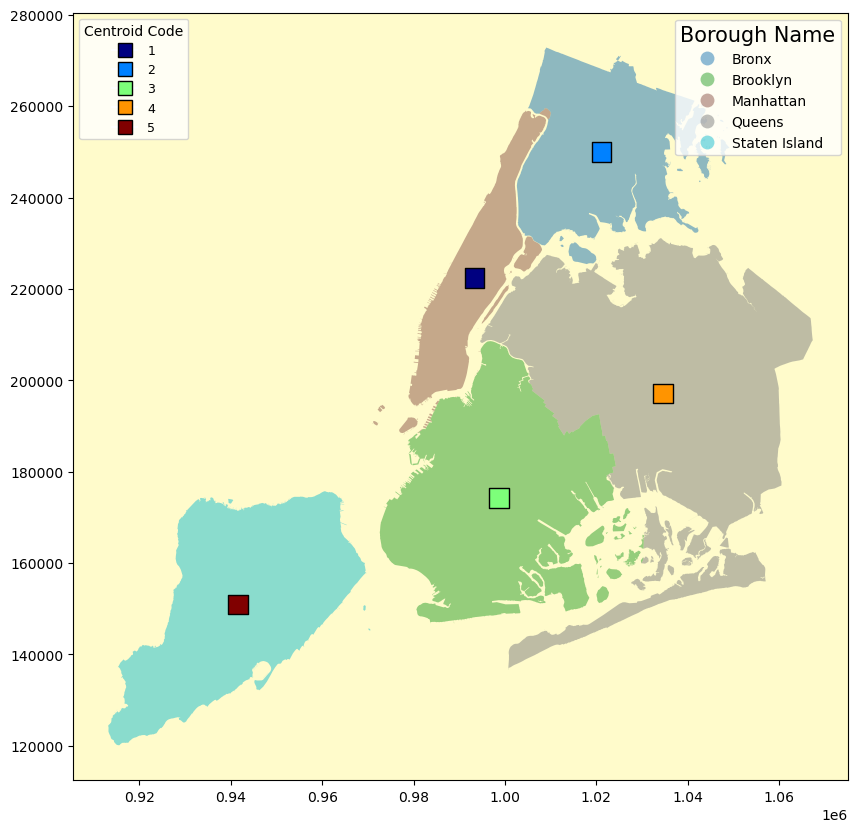

In [32]:
# create a figure with one axes object

fig, ax = plt.subplots(figsize=(10, 10))

# set background to bland color
ax.set_facecolor((255 / 255, 251 / 255, 203 / 255))

# use geopandas to plot solid polygons associated with Boroughs
#    ask for legend  (set location, but these will be oevrriden later)
df.plot(
    ax=ax,
    column='BoroName',
    legend=True,
    categorical=True,
    legend_kwds={
        'loc': 'upper left',
    },
    alpha=0.5,
)

# get the legend Geopandas creates
leg1 = ax.get_legend()

# get the graphic objects and associated label in this legend
h1 = leg1.legend_handles
t1 = [t.get_text() for t in leg1.texts]


# plot the second tranche of data (a point dataset), with square markers
# use jet colormap to clearly distinguish from previous colormap
# use black border to highlight symbol
df.set_geometry('centroid').plot(
    ax=ax,
    column='BoroCode',
    legend=True,
    categorical=True,
    legend_kwds={
        'loc': 'upper right',
    },
    marker='s',
    cmap='jet',
    markersize=200,
    edgecolor='black',
)

# get the geopandas created legend
leg2 = ax.get_legend()

# h2 are the handles to drawing objects
# t2 are the text associated with each drawing object in legend
# c2 are the color associated with the drawing object
h2 = leg2.legend_handles
t2 = [t.get_text() for t in leg2.texts]
c2 = [h.get_markerfacecolor() for h in h2]

# create a list of our own legend elements, using recipe from
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
#  we create a list of  line graphisc, with square markers
#  line color set to white so it doesnt show in legend
# marker color set to color from geopandas legend
# marker label set to text from geopandas legend
# marker size set small
legend_elements = [
    Line2D(
        [0],
        [0],
        marker='s',
        color='w',
        label=t_n,
        markerfacecolor=c_n,
        markeredgecolor='black',
        markersize=10,
    )
    for t_n, c_n in zip(t2, c2)
]


# create a new legend from our own list of our own legend elements
first_legend = plt.legend(
    handles=legend_elements,
    loc='upper left',
    fontsize=9,
)
first_legend.set_title('Centroid Code')

# add legend to current axes, as an artist, so it wont be overwriten
# by next legend call
ax.add_artist(first_legend)

# create a second legend using the handles to graphics, and labels from first geopandas call
ax.legend(
    h1,
    t1,
    loc='upper right',
    title_fontsize=15,
).set_title('Borough Name')

### Success 

At this stage I am prepared to pronounce Victory! and move on.

There was one path I took that didn't give quite what I wanted.  It turns out there is a ```matplotlib``` concept of a Figure legend of which you can have multiple (in different locations), with even an ```outside``` location specifier to specify the legend should not obscure the graphics in the Axes area.

Sadly, while the example from matplotlib documentation works just fine, with multiple legends, one each upper right and upper left aligned with the top of the plot, plots created by Geopandas do __NOT__ have the legends aligned with the top of the plot, but up about 10%, leaving a yawning white space above the plot.  In the example below, I filled it in with some Figure and Axes titles.

You also have to set the Axes legend (created by Geopandas) invisible, to prevent duplication with the Figure legends, if you go with this approach.

Text(0.5, 1.0, 'Boroughs and centroids')

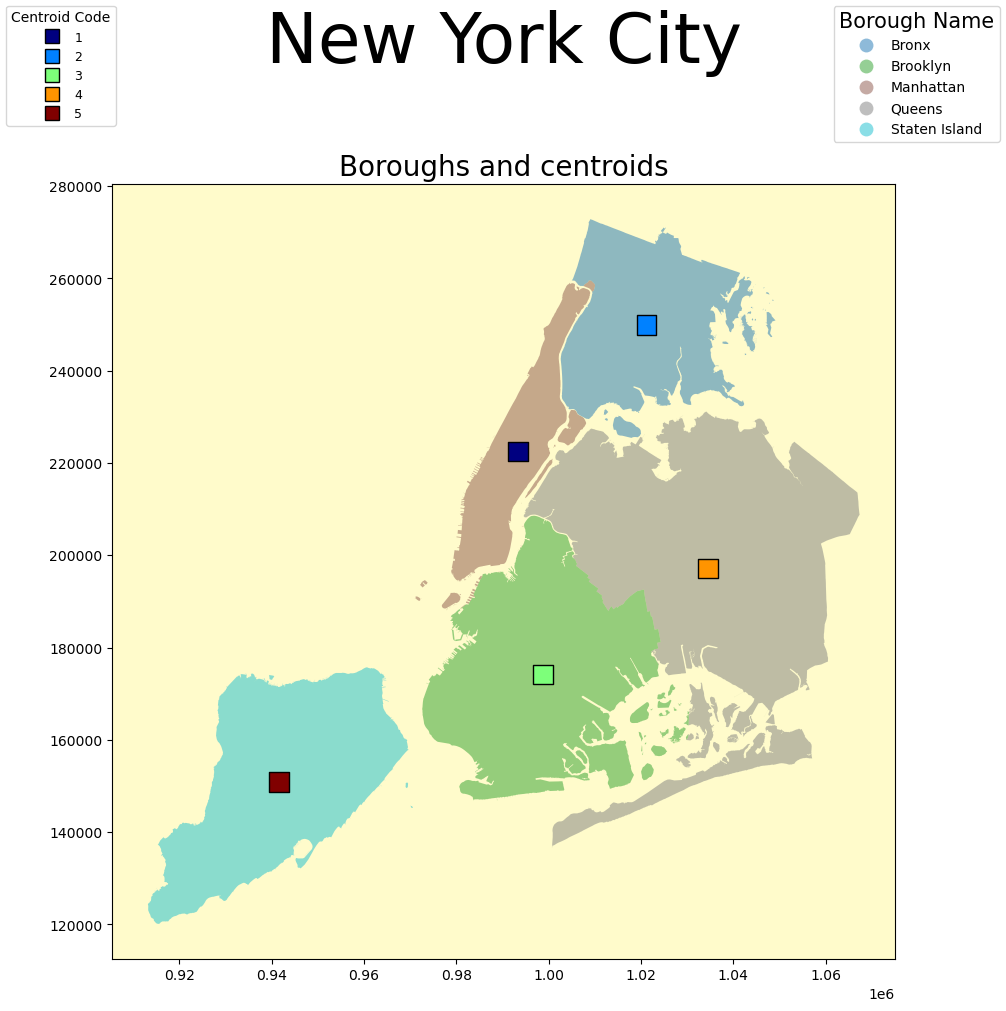

In [33]:
# create a figure with one axes object

fig, ax = plt.subplots(
    figsize=(10, 10), layout='constrained'
)

# set background to bland color
ax.set_facecolor((255 / 255, 251 / 255, 203 / 255))

# use geopandas to plot solid polygons associated with Boroughs
#    ask for legend  (set legend location, but these will be oevrriden later)
df.plot(
    ax=ax,
    column='BoroName',
    legend=True,
    categorical=True,
    legend_kwds={
        'loc': 'upper left',
    },
    alpha=0.5,
)

# get the legend Geopandas creates
leg1 = ax.get_legend()

# get the graphic objects and associated label in this legend
h1 = leg1.legend_handles
t1 = [t.get_text() for t in leg1.texts]


# plot the second tranche of data (a point dataset), with square markers
# use jet colormap to clearly distinguish from previous colormap
# use black border to highlight symbol
df.set_geometry('centroid').plot(
    ax=ax,
    column='BoroCode',
    legend=True,
    categorical=True,
    legend_kwds={
        'loc': 'upper right',
    },
    marker='s',
    cmap='jet',
    markersize=200,
    edgecolor='black',
)

# get the geopandas created legend
leg2 = ax.get_legend()

# h2 are the handles to drawing objects
# t2 are the text associated with each drawing object in legend
# c2 are the color associated with the drawing object
h2 = leg2.legend_handles
t2 = [t.get_text() for t in leg2.texts]
c2 = [h.get_markerfacecolor() for h in h2]

# create a list of our own legend elements, using recipe from
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
#  we create a list of  line graphisc, with square markers
#  line color set to white so it doesnt show in legend
# marker color set to color from geopandas legend
# marker label set to text from geopandas legend
# marker size set small
legend_elements = [
    Line2D(
        [0],
        [0],
        marker='s',
        color='w',
        label=t_n,
        markerfacecolor=c_n,
        markeredgecolor='black',
        markersize=10,
    )
    for t_n, c_n in zip(t2, c2)
]


# create a new legend from our own list of our own legend elements
first_legend = fig.legend(
    handles=legend_elements,
    loc='upper left',
    fontsize=9,
)
first_legend.set_title('Centroid Code')

# create a second legend using the handles to graphics, and labels from first geopandas call
fig.legend(
    h1,
    t1,
    loc='outside upper right',
    title_fontsize=15,
).set_title('Borough Name')

fig.suptitle(
    'New York City',
    fontsize=50,
)

ax.get_legend().set_visible(False)
ax.set_title(
    'Boroughs and centroids',
    fontsize=20,
)

------------------
## Reproducability Information

Information to assist in reproducing this notebook at a later time.

In [34]:
print('Notebook Name:', 'UserColorMaps.ipynb')
print('current wkg dir: ' + os.getcwd())
print(
    'Notebook run at: '
    + str(datetime.datetime.now())
    + ' local time'
)
print(
    'Notebook run at: '
    + str(datetime.datetime.utcnow())
    + ' UTC'
)
print('Notebook run on: ' + platform.platform())

Notebook Name: UserColorMaps.ipynb
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\GeoPandasSpatialDisplayNotebookProjectNotebookProject\develop
Notebook run at: 2023-05-15 19:14:30.797149 local time
Notebook run at: 2023-05-15 09:14:30.797149 UTC
Notebook run on: Windows-10-10.0.19044-SP0


In [35]:
%watermark

Last updated: 2023-05-15T19:14:30.830175+10:00

Python implementation: CPython
Python version       : 3.9.16
IPython version      : 8.13.1

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [36]:
%watermark -iv

matplotlib: 3.7.1
sys       : 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:28:38) [MSC v.1929 64 bit (AMD64)]
geopandas : 0.12.2
platform  : 1.0.8
numpy     : 1.24.3



In [37]:
%watermark -co

conda environment: geop_env

